In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#### Training and Test Data

In [96]:
df = pd.read_csv("../files/BRISTOR_Zegoland_all_%.csv")

In [97]:
X=df.iloc[:,9:]
y=df.iloc[:,5:6]


In [98]:
from sklearn.preprocessing import PowerTransformer

y=y.values
X=X.values  

pow=PowerTransformer()
y= pow.fit_transform(y.reshape(-1, 1))


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (24, 7)
X_test shape: (7, 7)
y_train shape: (24, 1)
y_test shape: (7, 1)


In [99]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('regressor', LinearRegression()),
    ('')
])


In [100]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [101]:
pred_values= pipeline.predict(X)   

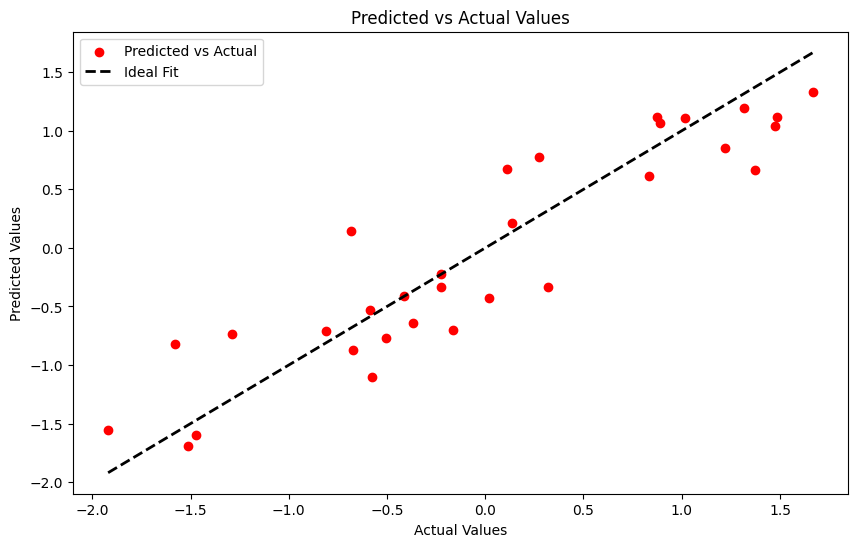

In [102]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, pred_values, color='red', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [103]:
from sklearn.preprocessing import PowerTransformer

pow=PowerTransformer()
y_trans= pow.fit_transform(y_train)

y_trans



array([[ 1.44402697],
       [-0.0998965 ],
       [-0.44597341],
       [-0.54102879],
       [ 0.43295559],
       [-1.44996254],
       [-0.09888636],
       [-0.37432301],
       [ 0.92743205],
       [-1.79172622],
       [-1.38075546],
       [ 1.30014464],
       [-1.34226532],
       [ 0.22771148],
       [ 1.72452169],
       [-0.5541898 ],
       [ 0.96952872],
       [ 0.38571741],
       [-1.15742797],
       [-0.68086483],
       [ 0.25169889],
       [ 1.10463151],
       [ 1.39177659],
       [-0.24284532]])

/var/folders/0f/7pcrwybx3_zfsnzs2qjgxp8h0000gn/T/ipykernel_15075/2185964080.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_trans, shade=True)


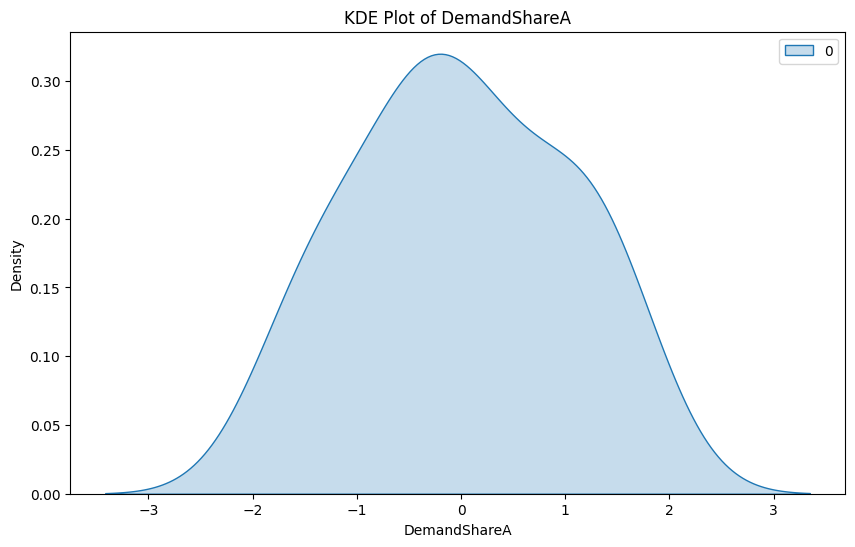

In [104]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_trans, shade=True)
plt.title('KDE Plot of DemandShareA')
plt.xlabel('DemandShareA')
plt.ylabel('Density')
plt.show()